In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(
    r"C:\Users\dell\OneDrive\Desktop\research\rbi_monetary_policy_data.xlsx",
    sheet_name="Sheet1"
)

In [6]:
df.head()

,date,API,Broad Money (M3),Repo rate,inflation rate,moving average inflation,Credit,moving average credit,Reverce repo rate
0,2025-10-31,0.399202,10.301629,5.5,0.254065,NaN,11.332816,NaN,3.35
1,2025-09-30,4.628999,9.231437,5.5,1.441813,NaN,10.786440,NaN,3.35
2,2025-08-31,4.115226,9.795018,5.5,2.072539,1.256139,10.119986,10.746414,3.35
3,2025-07-31,3.471295,9.606636,5.5,1.606218,1.706857,10.035976,10.314134,3.35
4,2025-06-30,1.523179,9.458112,5.5,2.103049,1.927269,9.476302,9.877421,3.35


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      179 non-null    datetime64[ns]
 1   API                       179 non-null    object        
 2   Broad Money (M3)          179 non-null    float64       
 3   Repo rate                 179 non-null    float64       
 4   inflation rate            179 non-null    object        
 5   moving average inflation  166 non-null    float64       
 6   Credit                    179 non-null    float64       
 7   moving average credit     177 non-null    float64       
 8   Reverce repo rate         179 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 12.7+ KB


In [9]:
df.describe()

,date,Broad Money (M3),Repo rate,moving average inflation,Credit,moving average credit,Reverce repo rate
count,179,179.000000,179.000000,166.000000,179.000000,177.000000,179.000000
mean,2018-05-31 08:50:56.983240192,10.801850,6.350000,5.714384,12.243949,12.170053,5.162849
min,2010-12-31 00:00:00,5.559142,4.000000,1.256139,3.646048,4.136760,3.350000
25%,2014-09-15 00:00:00,9.467738,5.900000,4.298284,8.800000,8.845601,3.350000
50%,2018-05-31 00:00:00,10.423737,6.500000,5.283081,11.576963,11.400000,5.750000
75%,2022-02-14 00:00:00,11.530096,7.250000,6.899833,15.707612,15.686731,6.250000
max,2025-10-31 00:00:00,18.680000,8.500000,10.753333,27.970000,24.830000,7.500000
std,NaN,2.384569,1.279198,2.237917,4.889099,4.711971,1.503685


In [13]:
df.index.strftime('%b-%y')

Index(['Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11',
       ...
       'Jan-25', 'Feb-25', 'Mar-25', 'Apr-25', 'May-25', 'Jun-25', 'Jul-25',
       'Aug-25', 'Sep-25', 'Oct-25'],
      dtype='object', name='date', length=179)

In [16]:
print(df.columns.tolist())


['API', 'Broad Money (M3)', 'Repo rate ', 'inflation rate ', 'moving average inflation', 'Credit', 'moving average credit', 'Reverce repo rate']


In [19]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace('%', '', regex=False)
      .str.replace('(', '', regex=False)
      .str.replace(')', '', regex=False)
)

In [20]:
print(df.columns.tolist())


['api', 'broad money m3', 'repo rate', 'inflation rate', 'moving average inflation', 'credit', 'moving average credit', 'reverce repo rate']


In [22]:
print(df.dtypes)


api                          object
broad money m3              float64
repo rate                   float64
inflation rate               object
moving average inflation    float64
credit                      float64
moving average credit       float64
reverce repo rate           float64
dtype: object


In [24]:
df['inflation rate'].unique()[:10]


array(['..', 7.65, 8.83, 9.38, 10.26, 10.36, 9.93, 9.86, 10.03, 9.73],
      dtype=object)

In [26]:
df['inflation rate'] = pd.to_numeric(df['inflation rate'], errors='coerce')


In [27]:
df['inflation rate'].dtype


dtype('float64')

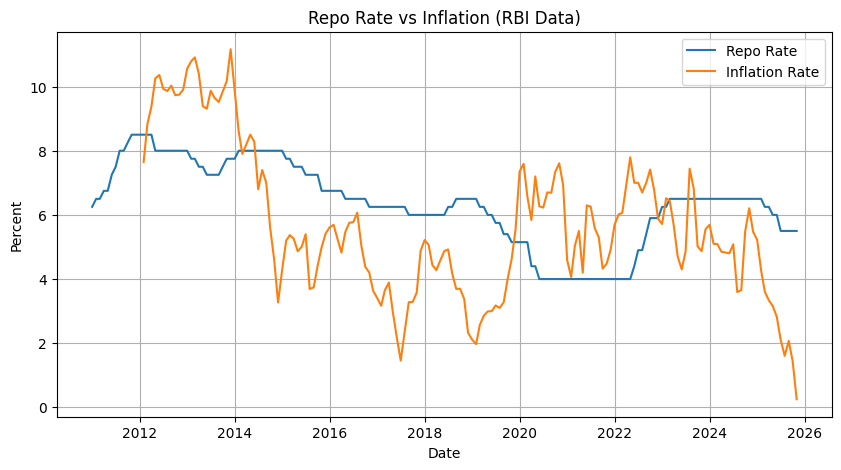

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df['repo rate'], label='Repo Rate')
plt.plot(df.index, df['inflation rate'], label='Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Repo Rate vs Inflation (RBI Data)')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
df['repo_lag_3'] = df['repo rate'].shift(3)
df['repo_lag_6'] = df['repo rate'].shift(6)

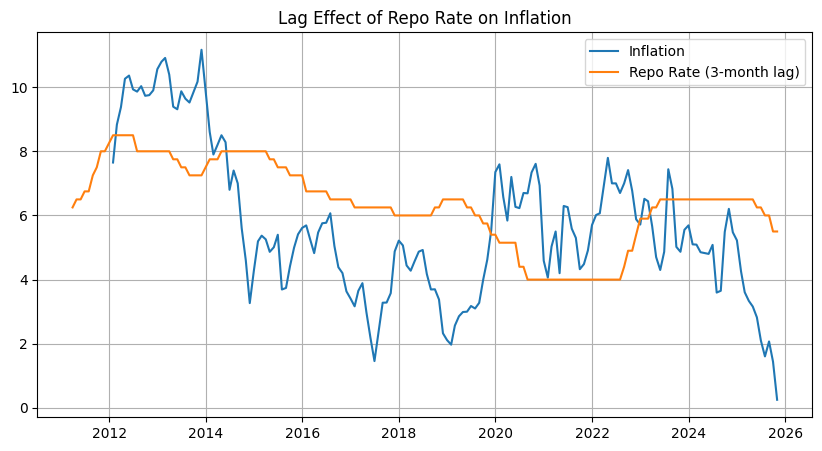

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['inflation rate'], label='Inflation')
plt.plot(df.index, df['repo_lag_3'], label='Repo Rate (3-month lag)')
plt.legend()
plt.title('Lag Effect of Repo Rate on Inflation')
plt.grid(True)
plt.show()


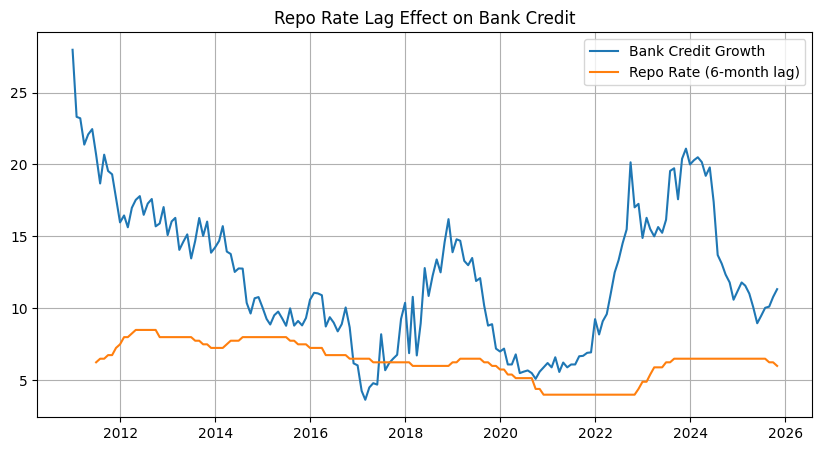

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['credit'], label='Bank Credit Growth')
plt.plot(df.index, df['repo_lag_6'], label='Repo Rate (6-month lag)')
plt.legend()
plt.title('Repo Rate Lag Effect on Bank Credit')
plt.grid(True)
plt.show()


In [37]:
import statsmodels.api as sm

X = df[['repo_lag_3']]
X = sm.add_constant(X)
y = df['inflation rate']

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         inflation rate   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     15.52
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           0.000121
Time:                        22:28:42   Log-Likelihood:                -367.50
No. Observations:                 166   AIC:                             739.0
Df Residuals:                     164   BIC:                             745.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3430      0.862      2.717      0.0

<hr>

<h2 style="color:#2C3E50;">Project Summary: RBI Monetary Policy & Inflation Analysis</h2>

<p>
This project analyzes the monetary policy transmission mechanism in India by examining the 
lagged impact of the Reserve Bank of India’s (RBI) repo rate on inflation.
Official monthly macroeconomic data was sourced directly from the 
<b>Reserve Bank of India (RBI – DBIE)</b>.
</p>

<h3 style="color:#34495E;">Data & Methodology</h3>
<ul>
  <li>Collected and cleaned RBI time-series data including repo rate and inflation indicators.</li>
  <li>Handled missing values, standardized variable names, and converted dates into a time-series index.</li>
  <li>Performed exploratory data analysis (EDA) and visualized macroeconomic trends.</li>
  <li>Applied <b>Ordinary Least Squares (OLS)</b> regression with lagged repo rate variables to capture policy transmission delays.</li>
</ul>

<h3 style="color:#34495E;">Key Findings</h3>
<ul>
  <li>Repo rate changes exhibit a statistically significant impact on inflation with a time lag.</li>
  <li>The results align with RBI’s documented monetary transmission mechanism.</li>
  <li>Low explanatory power is expected due to the multi-factor nature of inflation.</li>
</ul>

<h3 style="color:#34495E;">Tools & Technologies</h3>
<p>
Python (Pandas, Matplotlib, Statsmodels), Excel, Jupyter Notebook
</p>

<h3 style="color:#34495E;">Conclusion</h3>
<p>
The analysis highlights that monetary policy actions influence inflation with delays rather than instant effects.
This project demonstrates the application of econometric methods and data analysis
to real-world central banking and policy evaluation.
</p>

<hr>
